# Contents
Import Libraries and DF
boulder_data_clean_2
Colored Correlation Matrix Heatmap
Scatterplots
Pairplot
Categorical Plot
Revist questions
Hypothesis

In [58]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [2]:
#import dataframe
path=r'C:\\Users\\Admin\\London Uk Airbnb'

In [3]:
#ensure charts are displayed without having to call them specifically
%matplotlib inline

In [4]:
df = pd.read_csv(os.path.join(path,'Prepared data','data_new.csv'))
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_6108\2955913513.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'Prepared data','data_new.csv'))


Unnamed: 0                  Id  \
0              50               41870   
1             372              388306   
2              66              306405   
3             435              390876   
4             799              553543   
...           ...                 ...   
69346       69320  679489255469079962   
69347       69329            44639074   
69348       69334            38338919   
69349       69342            44197476   
69350       69343            42923785   

                                                    Name    Host_id  \
0                          Room in relaxed family house!     182993   
1                                    Garden flat, Putney    1942893   
2                    Spacious Double Room in East London    1575800   
3                    Peaceful Riverside Island Sanctuary    1954980   
4                     Newly furnished flat in Kensington    2720301   
...                                                  ...        ...   
69346  LUXURY sky-high suite + RIVER + CITY SKYLINE v...   52259351   
69347  Entire lovely family home with garden near London   17343987   
69348                                    Loveshack baby!    5005089   
69349  Airy,  sunlit, lovely apartment with Thames views  266785086   
69350                     Amazing Room Near TOWER BRIDGE  227259221   

               Neighbourhood         Room_type  price  Min_nights Last_review  \
0              Waltham Forest     Private room     37           2  2011-07-02   
1                  Wandsworth     Private room    908           1  2012-03-26   
2        Barking and Dagenham     Private room     41           4  2012-05-27   
3        Richmond upon Thames     Private room     35           3  2012-05-31   
4      Hammersmith and Fulham     Private room     35          14  2012-07-17   
...                       ...              ...    ...         ...         ...   
69346                 Lambeth  Entire home/apt    315           1         NaN   
69347    Kingston upon Thames  Entire home/apt    110           1         NaN   
69348    Richmond upon Thames  Entire home/apt    210           3         NaN   
69349           Tower Hamlets     Private room     96           2         NaN   
69350           Tower Hamlets     Private room     29          28         NaN   

       Calculated_listing_count  Availability_365  Nr_of_reviews_ltm  
0                             1                 0                  0  
1                             1               365                  0  
2                             1               365                  0  
3                             1                 0                  0  
4                             1                 0                  0  
...                         ...               ...                ...  
69346                        14               365                  0  
69347                         1                 0                  0  
69348                         1                 0                  0  
69349                         1                 0                  0  
69350                         1                 0                  0  

[69351 rows x 12 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'Name', 'Host_id', 'Neighbourhood ', 'Room_type',
       'price', 'Min_nights', 'Last_review', 'Calculated_listing_count',
       'Availability_365', 'Nr_of_reviews_ltm'],
      dtype='object')

# Exploratory data analysis

In [7]:
# For the start, a closer look at the data.
# Values for id and host_id will have no sense, so I don't want to see them.
df_without_id = df.drop(['Id','Host_id'], axis=1)

df_without_id.describe()

Unnamed: 0         price    Min_nights  Calculated_listing_count  \
count  69351.000000  69351.000000  69351.000000              69351.000000   
mean   34675.000000    177.208822      5.997505                 11.987498   
std    20020.053596    412.823024     25.709514                 37.148839   
min        0.000000      0.000000      1.000000                  1.000000   
25%    17337.500000     55.000000      1.000000                  1.000000   
50%    34675.000000    100.000000      2.000000                  1.000000   
75%    52012.500000    180.000000      4.000000                  4.000000   
max    69350.000000  25000.000000   1125.000000                285.000000   

       Availability_365  Nr_of_reviews_ltm  
count      69351.000000       69351.000000  
mean         108.520266           4.734438  
std          132.821088          12.032502  
min            0.000000           0.000000  
25%            0.000000           0.000000  
50%           32.000000           0.000000  
75%          228.000000           5.000000  
max          365.000000         660.000000

#For all categories we can see a significant difference between average and median values. It means that values of small share of listings can distort the overall picture.

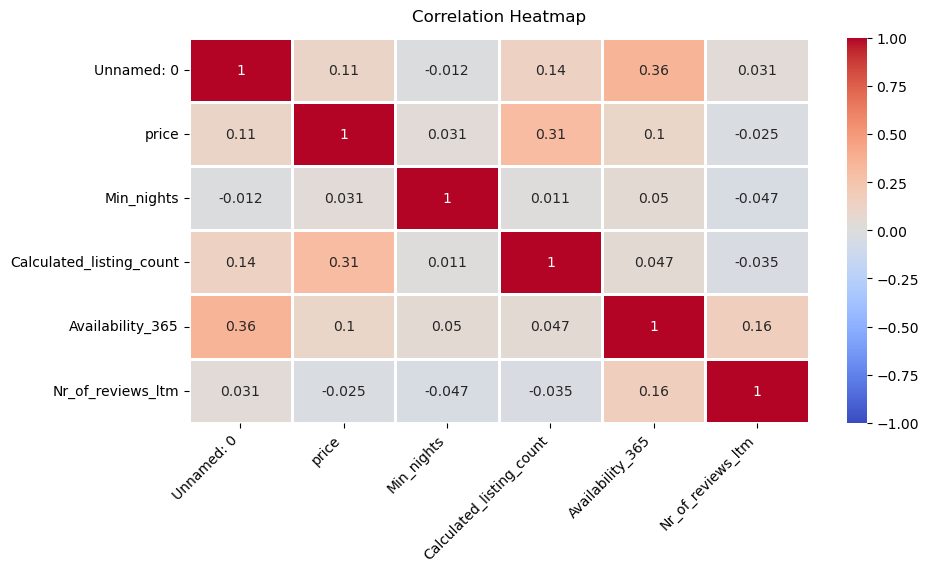

In [19]:
# Finally, let's check if there is correlation between quantitative data.
df_corr = df_without_id.corr()

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center= 0, linewidths=1, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
ax.set_title('Correlation Heatmap',pad=12);

There's no significant correlation between data.

# Scaterpot

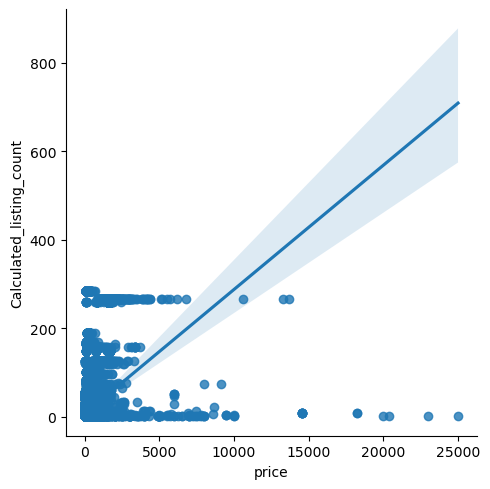

In [9]:
# Create a scatterplot for the "Price" and "Calculated_listing_count" columns in seaborn
sns.lmplot(x = 'price', y = 'Calculated_listing_count', data = df)

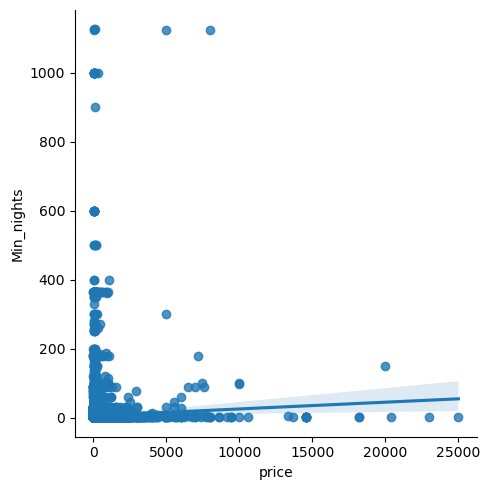

In [10]:
# Create a scatterplot for the "price" and "Min_nights" columns in seaborn
sns.lmplot(x = 'price', y = 'Min_nights', data = df)

The Price and Calculated listing scatterplot allows us to visually see more clearly how the ranking tapers off on the ends of the spectrum. It reveals how inconsistent each competition can be, alwasy producing many outliers.

# Pair Plots

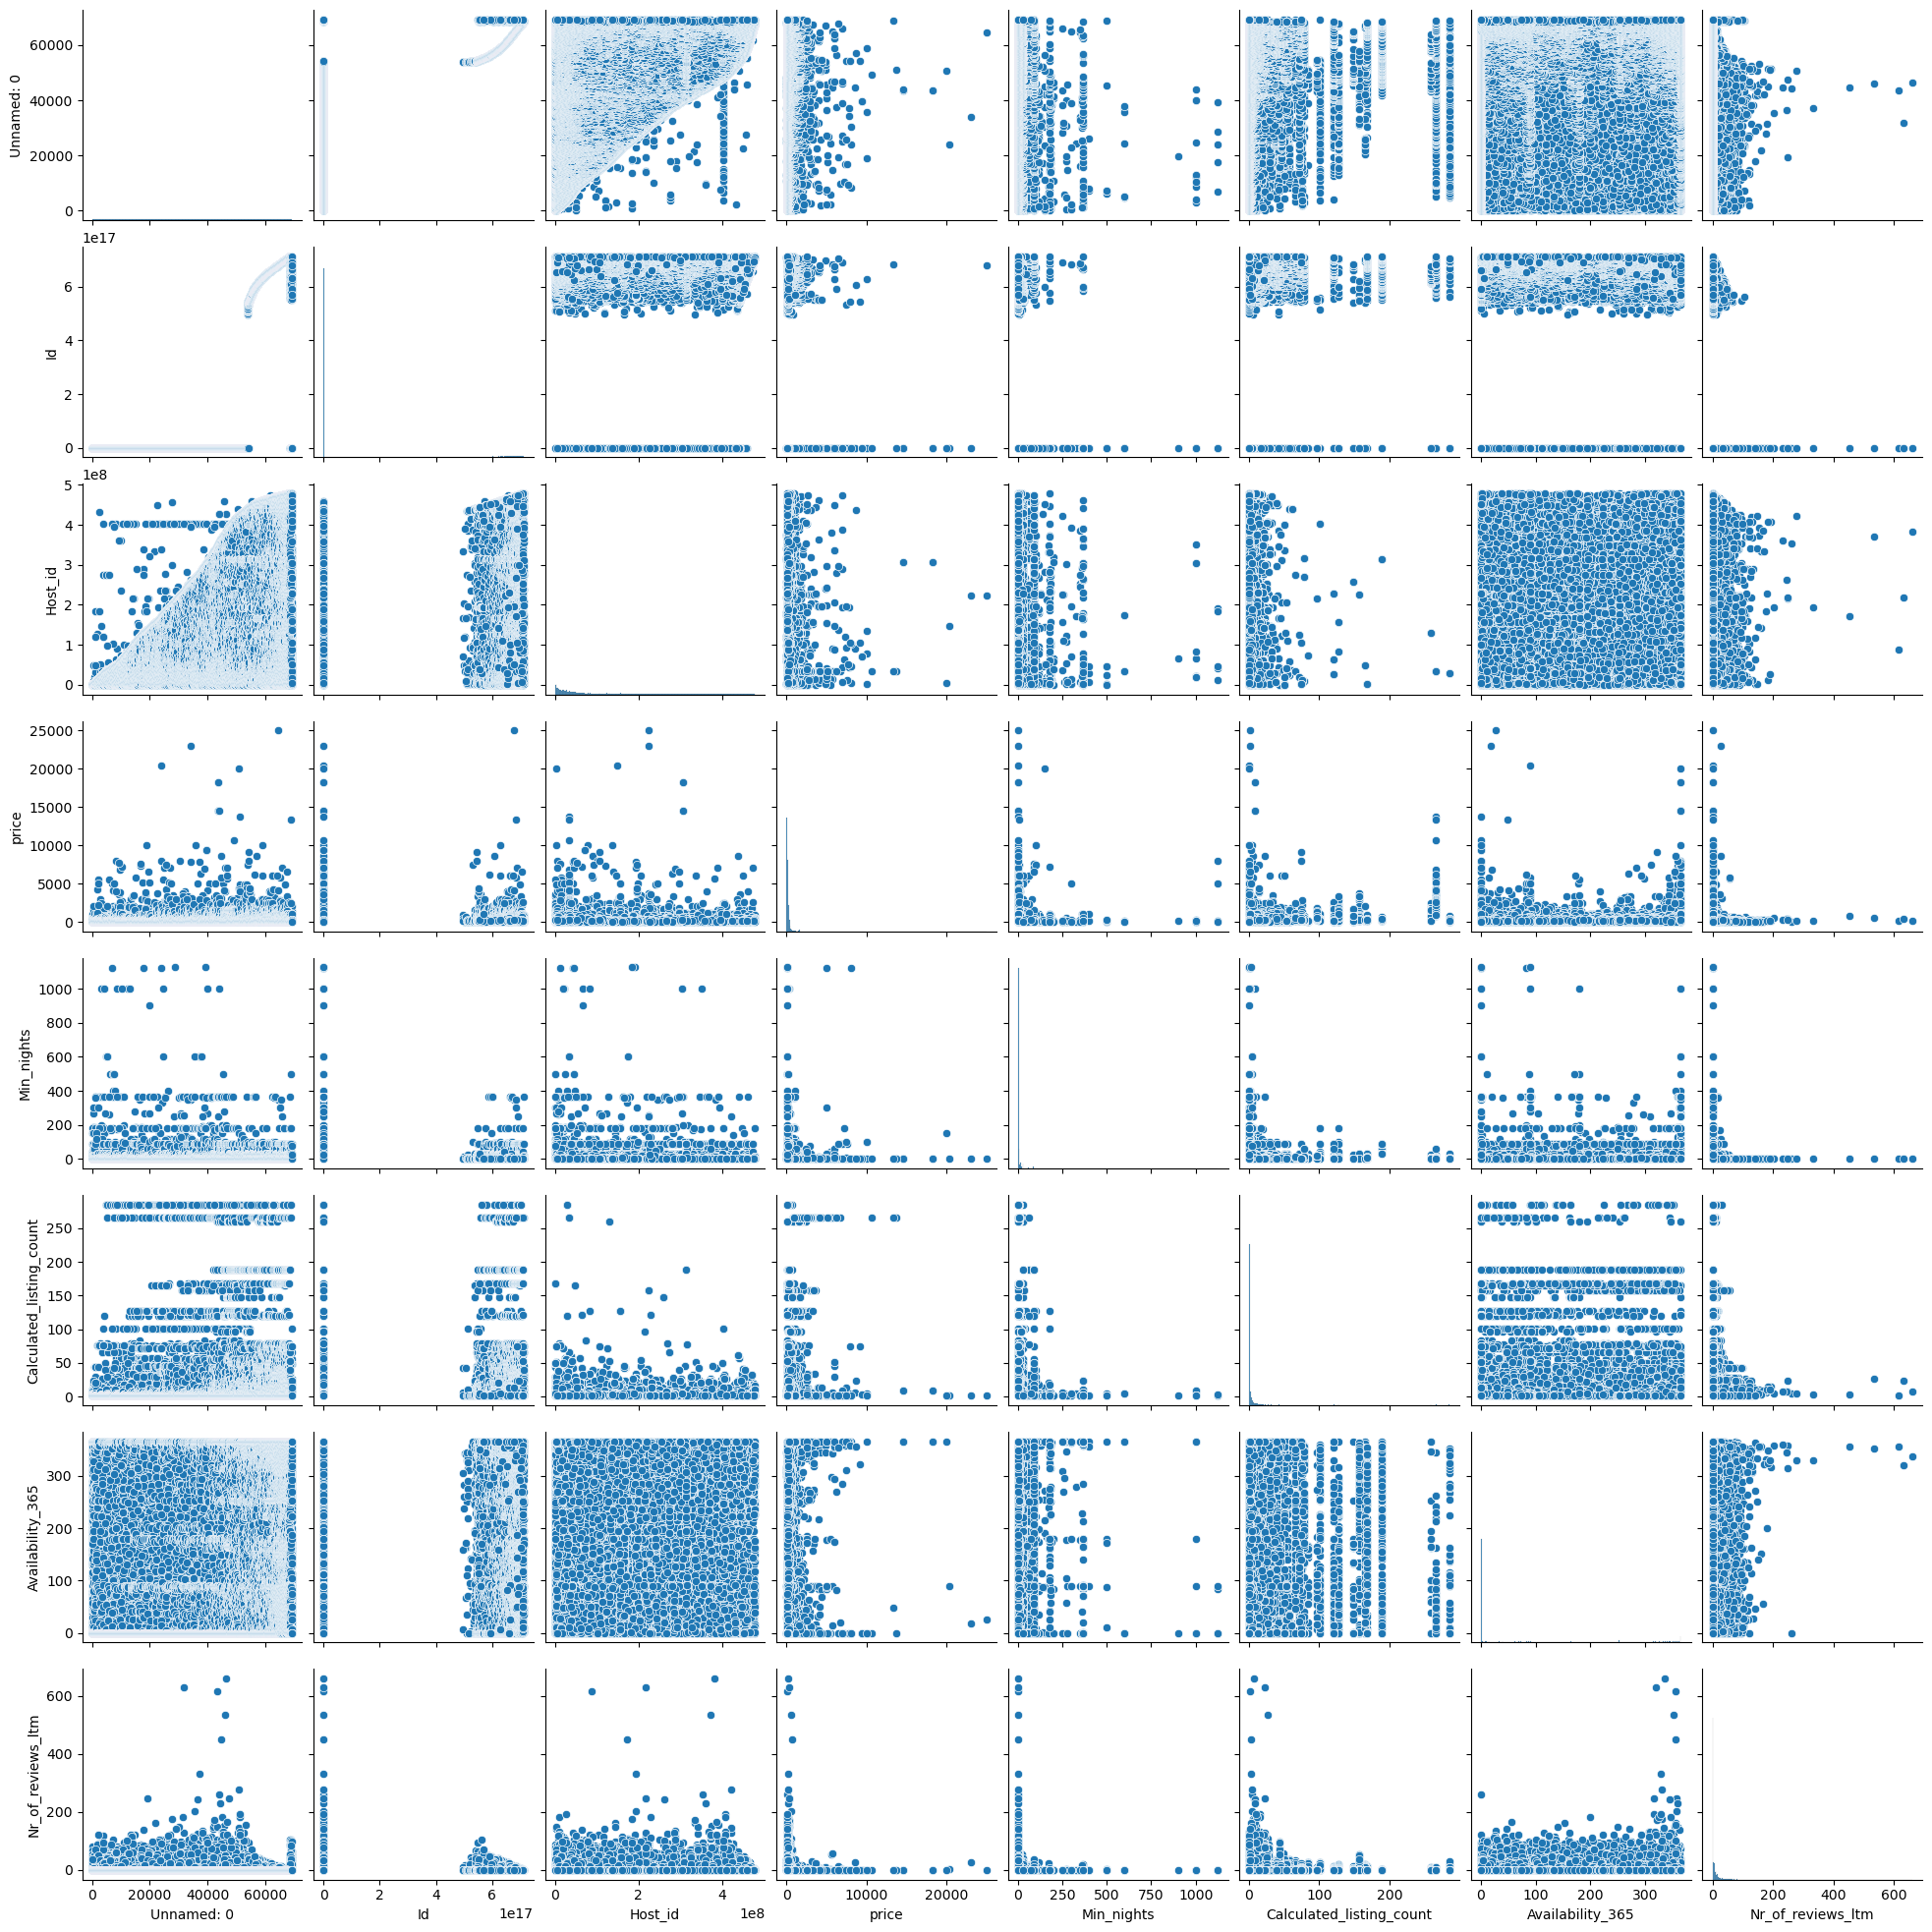

In [22]:
sns.pairplot(df,diag_kws={'bins':'sqrt'})

# Categorical Plot

In [34]:
df.corr()['price']

Unnamed: 0                  0.111087
Id                          0.068821
Host_id                     0.047994
price                       1.000000
Min_nights                  0.031468
Calculated_listing_count    0.311791
Availability_365            0.103498
Nr_of_reviews_ltm          -0.025045
Name: price, dtype: float64

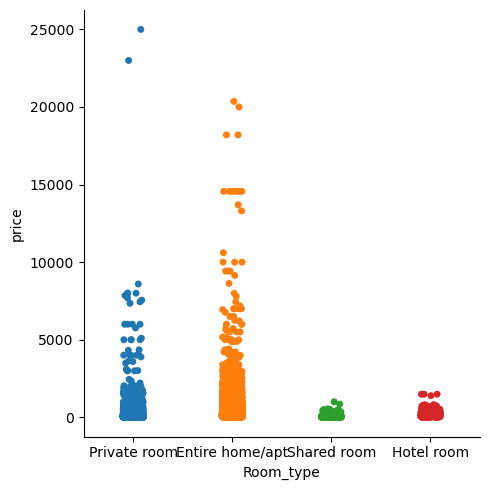

In [49]:
sns.catplot(x='Room_type',y='price',
            data=df,
            kind='strip');

In [36]:
df_corr = df.corr()['price'][:-1] # -1 because it is the latest row in df
golden_features_list = df_corr[abs(df_corr) > 0.1].sort_values(ascending=False)
print("There are {} correlated columns with respect to 'price':\n{}".format(len(golden_features_list), golden_features_list))

There are 4 correlated columns with respect to 'price':
price                       1.000000
Calculated_listing_count    0.311791
Unnamed: 0                  0.111087
Availability_365            0.103498
Name: price, dtype: float64


In [ ]:
Correlation is very weak for these variables (c < 0.2).

In [15]:
#What are the most popular room types?
df['Room_type'].value_counts()

Entire home/apt    41224
Private room       27479
Shared room          404
Hotel room           244
Name: Room_type, dtype: int64

Two categories - Entire home/apt (41,224 listings) and Private room (27,479 listings) - dominate the market, while Shared room (404 listings) and Hotel room (244 listings) aren't popular.

In [59]:
#How does the price change depending on room type?
median_price_by_room_type = df.pivot_table(
    values='price',
    index='Room_type',
    aggfunc='median',
    fill_value=0
).sort_values(by='price', ascending=False)


fig = px.bar(
    median_price_by_room_type,
    text_auto=True,
    title='Median price by room type'
)

fig.show()

In [62]:
#How does the price change depending on neighbourhood?
fig = px.histogram(
    df, 
    x='Neighbourhood ', 
    y='Nr_of_reviews_ltm',
    histfunc='avg',
    text_auto='.1f',
    title='Average number of reviews by neighbourhood for last 12 months'
)
fig.update_xaxes(categoryorder='total descending')

fig.show()

There are two surprising results for me.

City of London is the clear leader with almost 10 reviews/listing while it has only 424 listings (4th rank from the end).
Hillingdon - another unpopular neighbourhood with only 714 listings - is on the 2nd place with 6.8 reviews/listings.
On the other hand, it can be explained by the fact that more popular neighbourhoods may have many inactive listings without reviews. It can lower average value of the metric.

Unfortunately, we don't have information about character of the reviews, whether they are positive or negative. So we can't evaluate customer satisfaction by these numbers.